Geração 0: Melhor fitness = 0.9730, Features selecionadas = 20/30
Geração 5: Melhor fitness = 0.9817, Features selecionadas = 22/30
Geração 10: Melhor fitness = 0.9839, Features selecionadas = 20/30
Geração 15: Melhor fitness = 0.9839, Features selecionadas = 20/30
Geração 20: Melhor fitness = 0.9840, Features selecionadas = 18/30
Geração 25: Melhor fitness = 0.9840, Features selecionadas = 17/30
Geração 30: Melhor fitness = 0.9840, Features selecionadas = 17/30
Geração 35: Melhor fitness = 0.9841, Features selecionadas = 15/30
Geração 40: Melhor fitness = 0.9841, Features selecionadas = 14/30
Geração 45: Melhor fitness = 0.9841, Features selecionadas = 14/30

Resultado após 50 gerações:
Melhor fitness: 0.984149
Número de features selecionadas: 14/30
Índices das features selecionadas: [ 0  1  5  6 12 17 20 21 22 23 24 27 28 29]


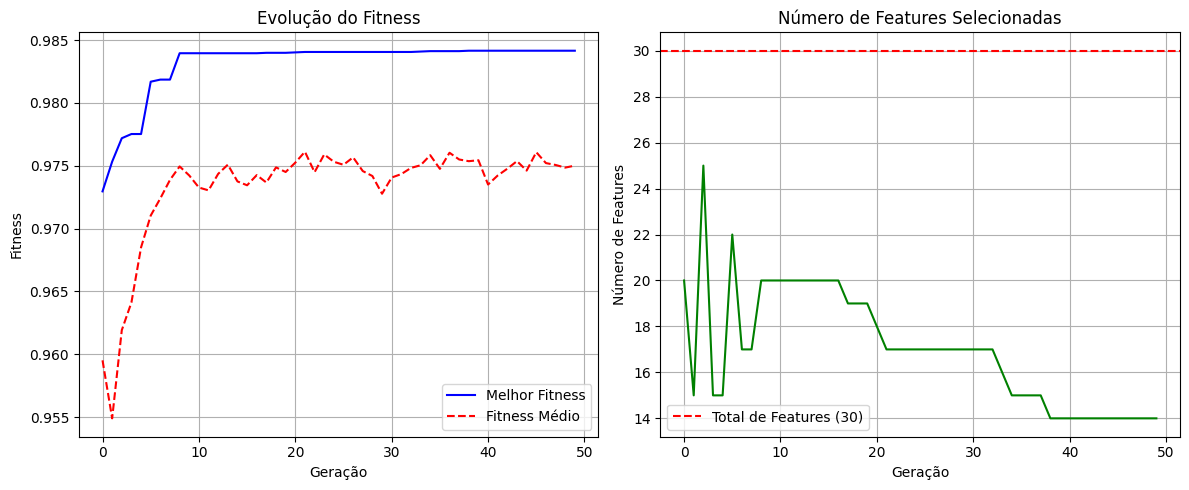

Acurácia no conjunto de teste: 0.9649
Acurácia com todas as features: 0.9737

Features selecionadas:
- mean radius
- mean texture
- mean compactness
- mean concavity
- perimeter error
- concave points error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst concave points
- worst symmetry
- worst fractal dimension


In [1]:
# -*- coding: utf-8 -*-

# Exemplo de uso com dataset

"""Testa o algoritmo GA-ACO em um dataset para seleção de features."""
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ga_aco import GAACO


# Este exemplo utiliza o dataset de câncer de mama do sklearn.
# O algoritmo GA-ACO é um híbrido de Algoritmos Genéticos e Ant Colony Optimization
# Carrega o dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Normaliza os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define o classificador para avaliar as features
classifier = SVC(gamma='auto')

# Cria e executa o algoritmo híbrido
gaaco = GAACO(X_train, y_train, classifier=classifier, cv=5)
best_solution, best_fitness, selected_features = gaaco.run()

# Avalia o modelo final usando apenas as features selecionadas
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Treina o modelo final
final_model = SVC(gamma='auto')
final_model.fit(X_train_selected, y_train)

# Avalia no conjunto de teste
test_accuracy = final_model.score(X_test_selected, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

# Compara com o modelo usando todas as features
full_model = SVC(gamma='auto')
full_model.fit(X_train, y_train)
full_accuracy = full_model.score(X_test, y_test)
print(f"Acurácia com todas as features: {full_accuracy:.4f}")

# Imprime os nomes das features selecionadas
if hasattr(data, 'feature_names'):
    selected_names = [data.feature_names[i] for i in selected_features]
    print("\nFeatures selecionadas:")
    for name in selected_names:
        print(f"- {name}")

